# Loading Image data

Cat vs Dog dataset

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import helper

The easiest way to load image data is with `datasets.ImageFolder` of `torchvision`

> `datasets.ImageFolder(root, transform)`

Images are arranged in this way (each class has it's own directory)

```
root
├── dog
│    ├── abc.png
│    ├── xyz.png
│    ...
│    └── assd.png
│
└── cat
     ├── adaas.png
     ├── mvv.png
     ...
     └── xaz.png
```
 
- Images are then **labeled with** the class taken from **directory name**

> **Exercise**: Load images from the Cat_Dog_data/train folder, define a few transforms, then build the dataloader.

In [2]:
data_dir = 'Cat_Dog_data/train/'

transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

In [3]:
dataset = datasets.ImageFolder(data_dir, transform)

In [4]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [5]:
def plot_batch(images, labels, title=None):
    _labels = labels.numpy()
    _images = images.numpy().transpose(0, 2, 3, 1) # N C H W -> N H W C
    sub_index = 1
    label_str = ['cat', 'dog']
    plt.figure(figsize=(12, 7))
    for label, img in zip(_labels, _images):
        plt.subplot(4, 8, sub_index)
        sub_index += 1
        plt.imshow(img)
        plt.title(label_str[label])
        plt.axis('off')
    if title is not None:
        plt.suptitle(title)
    plt.show()

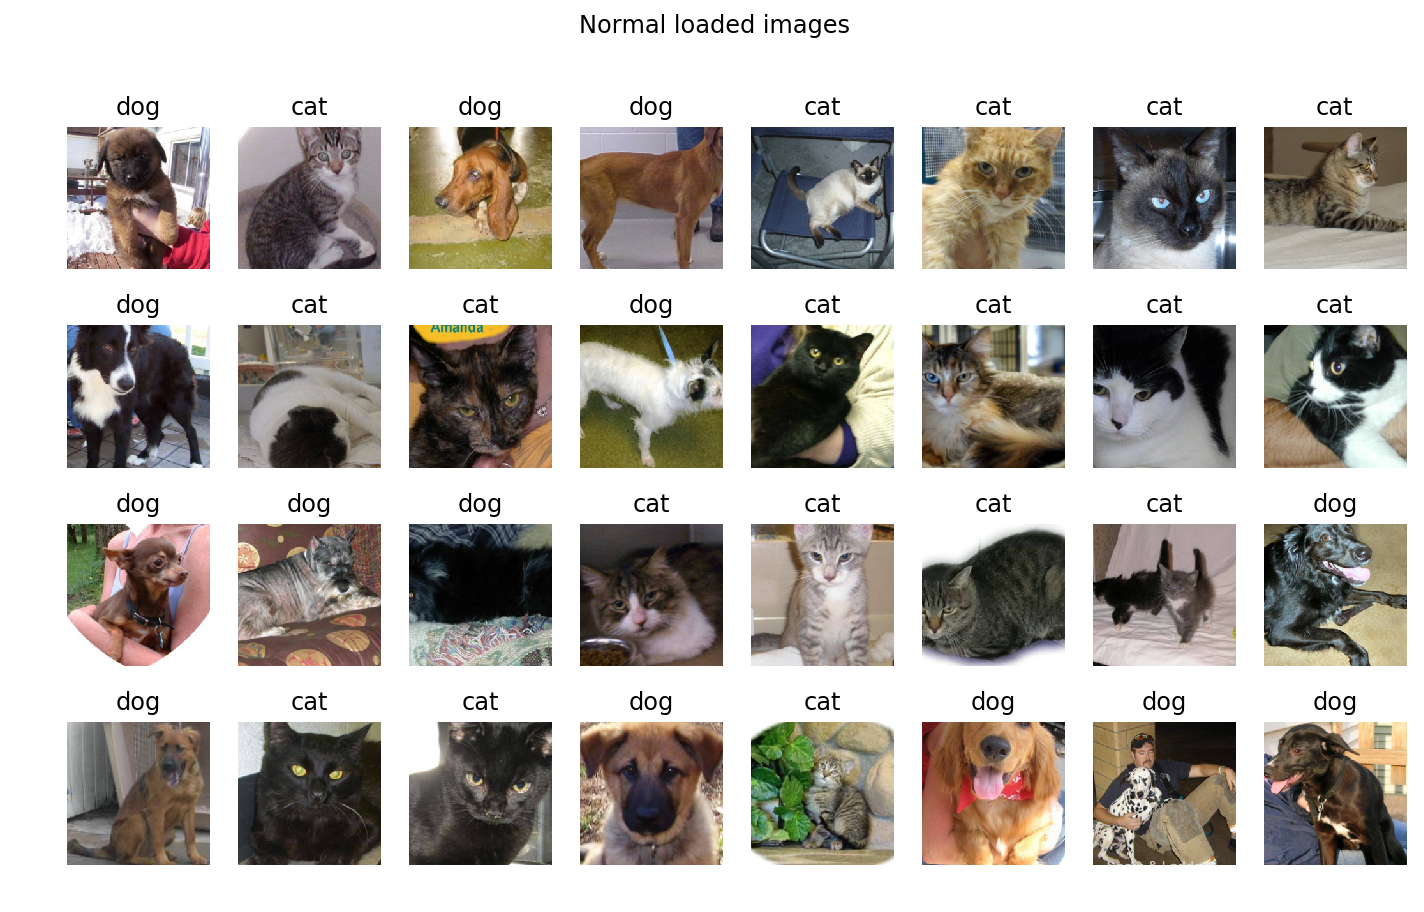

In [6]:
images, labels = next(iter(dataloader))
# helper.imshow(images[0], normalize=False)
plot_batch(images, labels, "Normal loaded images")

## Data Augmentation

Augmentation : Adding randomness (noise) into the input data
- randomly crop, rotate, scale, mirror, ...

- The network will see the same image but in different locations, sizes, orientations

- You'll also typically want to normalize images with transforms.Normalize $\leftarrow$ Normalizing helps keep the network work **weights near zero** which in turn **makes backpropagation more stable**

> **Exercise**: Define transforms for training data and testing data below. Leave off normalization for now.

In [7]:
data_dir = 'Cat_Dog_data/'
train_transforms = transforms.Compose([
    transforms.RandomRotation(30), # random rotate 30 degree
    transforms.RandomResizedCrop(224), # size random 0.08 to 1.0 of 224, shrink or stretch img
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                        [0.5, 0.5, 0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                        [0.5, 0.5, 0.5])
])

In [8]:
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


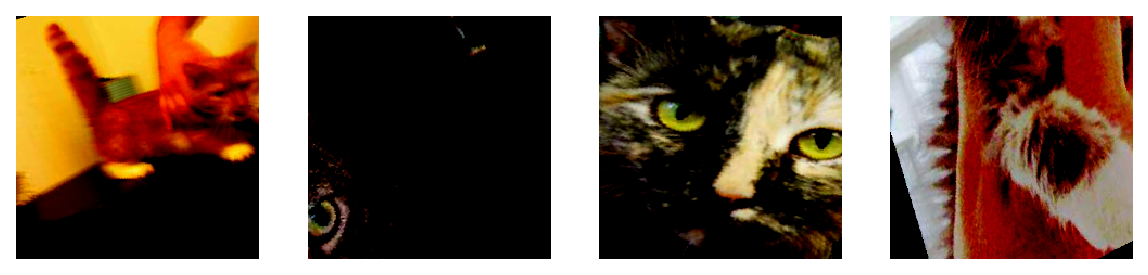

In [9]:
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


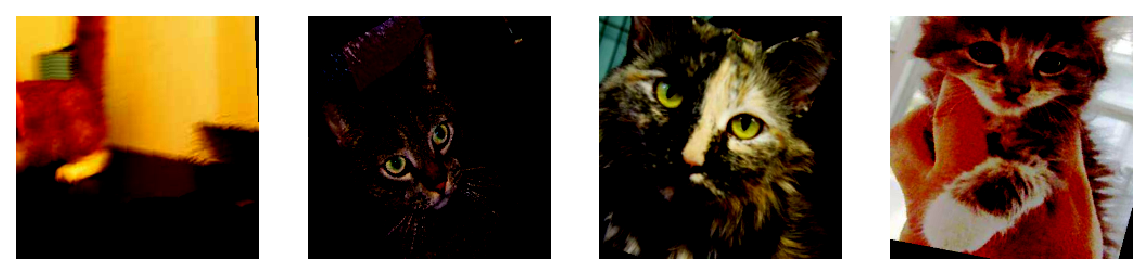

In [10]:
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


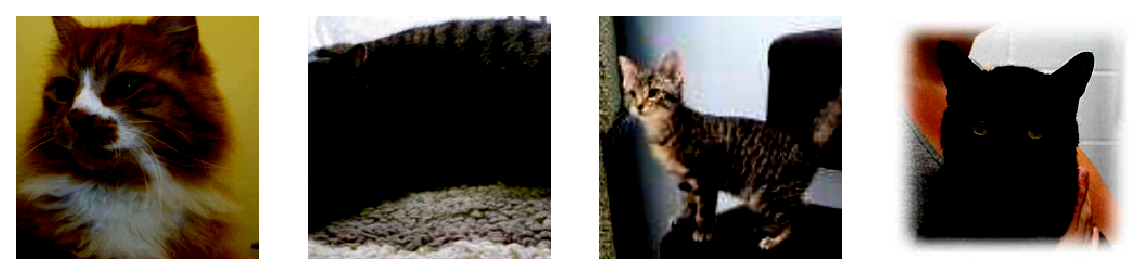

In [11]:
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)